<a href="https://colab.research.google.com/github/elyorbek8/ML_journey/blob/main/regression_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 1: calculating values manually.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


# Overall description
This practice is about simple linear regression concepts. You should use house data related only a particular district (`Чиланзарский`). And Find a specific column with strong linear relationship with house prices.
Specifically, you should do all operations manually!

# Task 1:
Calculating $\theta_0$ and $\theta_1$ coeffitcients by using `x` and `y`.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Here, $\tilde{x}$ is the mean value of `x` column, and $\tilde{y}$ is that of `y` column.

# Task 2
After finding the coeffitcients, the formula can be complete.

![Imgur](https://i.imgur.com/iT5tffj.png)

Then, you should calculate a particular number of `y` values by using random values of `x` in the formula.


# Task 3
You should evaluate your formula by the metrics `MAE` - Mean Absolute Error and `RMSE` - Root Mean Squared Error.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

#Task1

In [ ]:
# getting the wanted data set
housing = df[df['district'] == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
# finding the strongest relationship
housing.corr(numeric_only= True)

,rooms,size,level,max_levels,price
rooms,1.000000,0.868771,0.265235,0.279517,0.703835
size,0.868771,1.000000,0.306221,0.444404,0.843639
level,0.265235,0.306221,1.000000,0.548681,0.138780
max_levels,0.279517,0.444404,0.548681,1.000000,0.340015
price,0.703835,0.843639,0.138780,0.340015,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

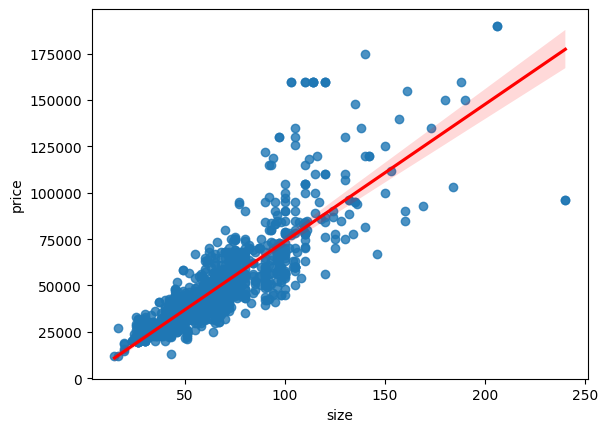

In [ ]:
sns.regplot(data= housing, x= 'size', y= 'price', line_kws= dict(color= 'r'))
plt.show()

# Spliting the data set to **test set** and **train set**.

In [ ]:
# separating parameters and labels
x= housing['size']
y= housing['price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 42)

In [ ]:
# assigning x and y and converting them to numpy array
x_train_ar= x_train.to_numpy()
y_train_ar= y_train.to_numpy()

print(x_train_ar, '\n', y_train_ar,)

[ 58. 180.  38. ...  67.  47.  68.] 
 [ 32000. 150000.  28900. ...  35000.  32000.  50000.]


In [ ]:
# calculating mean values
x_mean = np.mean(x_train_ar)
y_mean = np.mean(y_train_ar)

print('x_mean:', x_mean)
print('y_mean:', y_mean)

x_mean: 61.99421595598349
y_mean: 45534.34112792297


In [33]:
# finding coeffitcients
c1 = (np.sum((x_train_ar - x_mean) * (y_train_ar - y_mean))) / (np.sum((x_train_ar - x_mean)**2))
c2 = y_mean - c1 *x_mean

print('c1 = ', c1)
print('c2 = ', c2)

c1 =  732.7784051414766
c2 =  106.31843170110369


# Task 2: finding predicted `y` values.

In [ ]:
y_pred = c1 * x_test + c2
y_pred

,size
392,39676.352309
6641,30883.011448
4251,26486.341017
5161,44073.022740
4157,35279.681878
...,...
416,44073.022740
3616,91703.619074
6181,38210.795499
3758,88039.727049


In [31]:
# comparing the prediction with the real values
pred_show = pd.DataFrame({'Size': x_test, 'Prediction': y_pred, 'Real': y_test})
pred_show.head()

,Size,Prediction,Real
392,54.0,39676.352309,37500.0
6641,42.0,30883.011448,26500.0
4251,36.0,26486.341017,25500.0
5161,60.0,44073.022740,39000.0
4157,48.0,35279.681878,32500.0


# Task 3: metrics

In [29]:
# calculating metrics
# MAE
mae = (np.sum(np.abs(y_pred - y_test)))/len(y_pred)

# RMSE
rmse = np.sqrt((np.sum((y_pred - y_test)**2))/len(y_pred))

print('MAE = ', mae.round())
print('RMSE = ', rmse.round())

MAE =  7270.0
RMSE =  12735.0
